In [2]:

def get_index_permutation(l1, l2):
    """ 
    Takes two lists l1 and l2 
    that are permutations of each other, 
    returns a list mapping the indexes 
    of l1 to the indexes in l2
    """
    
    d = {}

    for i in range(len(l2)):
        d[l2[i]] = i

    perm_lst = []
    for i in range(len(l1)):
        perm_lst.append(d[l1[i]])

    return perm_lst

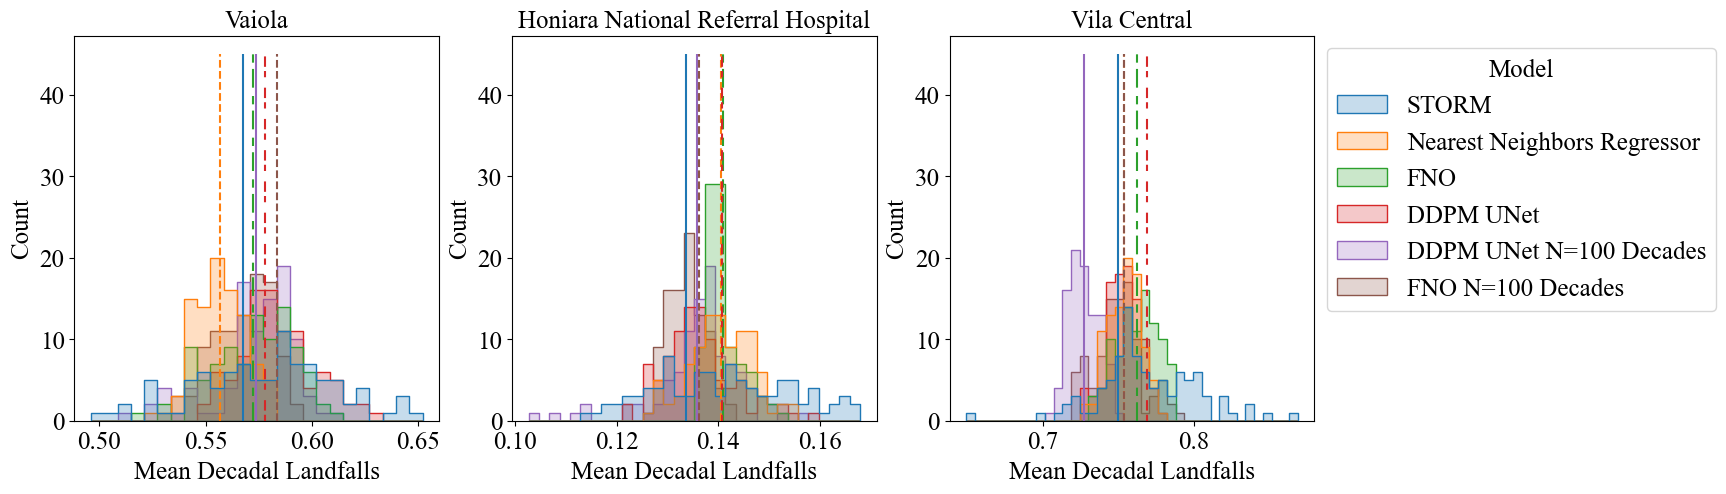

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## taken from MachineLearning.Evaluation.figures make_example_site_histogram_figures
## how to plot the data
plt.rcParams["font.family"] = "Times New Roman"

df = pd.read_pickle('histogram_data (1).pkl')

df_ood = pd.read_pickle('histogram_data_out_of_domain.pkl')

plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.title_fontsize'] = 18

hospitals = df["Hospital"].unique()
fig, axes = plt.subplots(1,len(hospitals))

df_1 = df
df_2 = df_ood
df_1 = df[df.Model != 'FNO N=100 Decades']
df_1 = df_1[df_1.Model != 'DDPM UNet N=100 Decades']

df_2 = df_ood[df_ood.Model != 'FNO N=100 Decades']
df_2 = df_2[df_2.Model != 'DDPM UNet N=100 Decades']

dfs = [df_1, df_2]
j=1

for i, hospital in enumerate(hospitals):
    ax = axes[i]
        
    data = dfs[j][dfs[j].Hospital == hospital]

    
    ax.set_title(hospital, fontsize=18)
            
    use_legend = (i == len(hospitals) - 1) # and (j == 0)
    
    p = sns.histplot(
                    data=data,
                    hue='Model',
                    x='Mean Decadal Landfalls',
                    element='step', 
                    common_bins=True,
                    common_norm=False,
                    ax=ax,
                    legend=use_legend
    )
    
    mean_df = data.groupby("Model")['Mean Decadal Landfalls'].mean().reset_index()
    median_df = data.groupby("Model")['Mean Decadal Landfalls'].median().reset_index()

    medians = list(median_df["Mean Decadal Landfalls"])
    means = list(mean_df["Mean Decadal Landfalls"])
    
    models = list(mean_df["Model"])
    models2 = list(data["Model"].unique())
    indexes = get_index_permutation(models, models2)
        
    means = [means[i] for i in indexes]
    medians = [medians[i] for i in indexes]
        
        
    ax.vlines(means, 0, 45, colors=sns.color_palette(n_colors=len(models)), ls=["-", "--", (0,(9,3,4,4)), (0, (3, 2, 5, 5))])
    '''ax.vlines(
            medians,
            0,
            45,
            colors=sns.color_palette(n_colors=len(models)),
            linestyle="--"
        )'''
        
    if use_legend:
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

fig.set_size_inches(16, 5)


In [17]:
## compute the ensemble means
means = df.groupby(["Model", "Hospital"])['Mean Decadal Landfalls'].mean()



In [4]:
## get how much the means change between in domain and out of domain

means = df.groupby(["Model", "Hospital"])['Mean Decadal Landfalls'].mean().reset_index()
means["Variance"] = df.groupby(["Model", "Hospital"])['Mean Decadal Landfalls'].var().reset_index()['Mean Decadal Landfalls'] * 10000
means_ood = df_ood.groupby(["Model", "Hospital"])['Mean Decadal Landfalls'].mean().reset_index()
means_ood["Variance"] = df_ood.groupby(["Model", "Hospital"])['Mean Decadal Landfalls'].var().reset_index()['Mean Decadal Landfalls'] * 10000


In [5]:
means["Mean Decadal Landfalls Out of Domain"] = means_ood["Mean Decadal Landfalls"]

In [6]:
means["Difference"] = (means["Mean Decadal Landfalls Out of Domain"] - means["Mean Decadal Landfalls"]) * 1000

In [8]:
## print latex table
## this table is edited for formatting in the paper

print(means.groupby(
    ["Hospital", "Model"]
)[
      ["Variance", "Mean Decadal Landfalls", 
       "Mean Decadal Landfalls Out of Domain", 
       'Difference']].apply(lambda x: x).droplevel(2, axis=0).to_latex(float_format="%.3f"))
      

\begin{tabular}{llrrrr}
\toprule
 &  & Variance & Mean Decadal Landfalls & Mean Decadal Landfalls Out of Domain & Difference \\
Hospital & Model &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{Honiara National Referral Hospital} & DDPM UNet & 0.570 & 0.139 & 0.136 & -3.177 \\
 & DDPM UNet N=100 Decades & 0.632 & 0.139 & 0.136 & -2.927 \\
 & FNO & 0.093 & 0.141 & 0.141 & -0.183 \\
 & FNO N=100 Decades & 0.133 & 0.134 & 0.134 & -0.133 \\
 & Nearest Neighbors Regressor & 0.332 & 0.141 & 0.141 & -0.548 \\
 & STORM & 1.596 & 0.141 & 0.141 & -0.285 \\
\cline{1-6}
\multirow[t]{6}{*}{Vaiola} & DDPM UNet & 1.996 & 0.595 & 0.583 & -11.995 \\
 & DDPM UNet N=100 Decades & 0.789 & 0.589 & 0.574 & -15.055 \\
 & FNO & 3.418 & 0.559 & 0.572 & 12.627 \\
 & FNO N=100 Decades & 1.749 & 0.559 & 0.567 & 7.980 \\
 & Nearest Neighbors Regressor & 1.813 & 0.558 & 0.557 & -0.934 \\
 & STORM & 6.616 & 0.558 & 0.578 & 19.696 \\
\cline{1-6}
\multirow[t]{6}{*}{Vila Central} & DDPM UNet & 1.228 & 0.753 & 0.753 & 0.147 \